## EDA

1. Understand Data

- numeric 
 - discrete (eg: no of students)
 - continous (eg: weight, height)

- categorical
 - nominal
 - ranking

2.read_csv >> summary
- Shape (# Columns, # rows) eg: 1000 rows, 9 columns
- Info 
  - data type of all 25 fields (numeric=int64, float64, char/string = object)
  - breakdown: int64(5) float64(5) object(15)
  - null value count for each field
  
3.describe()
- Summary statistics of numerical fields by default
- min max count mean std etc...

4. Find Missing Value using isnull().sum()
5. Number of unique values in the dataset = nunique()
6. count() - count of values of all fields
7. after finding missing values, replace with mean


## Testing an example
1. loan risk approval = classification
2. titantic = classification
3. HDB resale price = regression
4. Loan amount = regression
5. Student Performance = classification
6. Student intake = classification
7. What grade = if its in numbers then regression, if its in categories than its classification
8. Can he placebale = classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# Summary stats of all numeric fields by default

# df.describe(include='object')
# df.describe(include='all')

df.describe().round(2) # only numerics

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,5140.00,24.80,82.00,3.00


In [6]:
## as we found no missing info in .info()
# We many find NAN (not a number or ?)

## function to findout null values and sum the null values

df.isnull().sum() ## summary of all fields with null values and (Sum the value if Null is TRUE)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df.count() # to count the number of rows we have

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64

In [8]:
df.groupby('horsepower').mean().round(2).head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
horsepower,,,,,,,
100,19.59,5.71,219.47,3144.47,15.84,74.59,1.24
102,20.00,4.00,130.00,3150.00,15.70,76.00,2.00
103,20.30,5.00,131.00,2830.00,15.90,78.00,2.00
105,20.50,5.83,231.67,3374.33,16.62,76.33,1.00
107,21.00,6.00,155.00,2472.00,14.00,73.00,1.00


In [9]:
df.horsepower = df.horsepower.str.replace('?','Nan').astype(float)

# Missing value handing and fill with the mean
df.horsepower.fillna(df.horsepower.mean(),inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


C:\Users\pwy_9\AppData\Local\Temp/ipykernel_8180/3496305967.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.horsepower = df.horsepower.str.replace('?','Nan').astype(float)


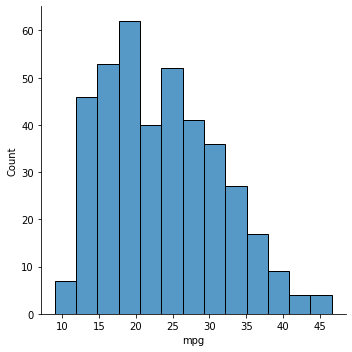

In [13]:
sns.displot(df.mpg)

<AxesSubplot:xlabel='cylinders', ylabel='Count'>

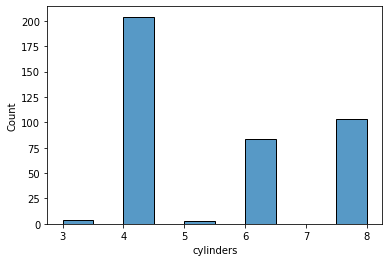

In [16]:
sns.histplot(df.cylinders)
## observation no cars with 7 cylinders
## more cars with 4 cylinders

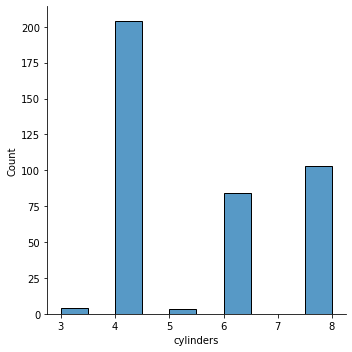

In [35]:
## explore range-- distribution
# sns.boxplot(df.cylinders)
sns.displot(df.cylinders)

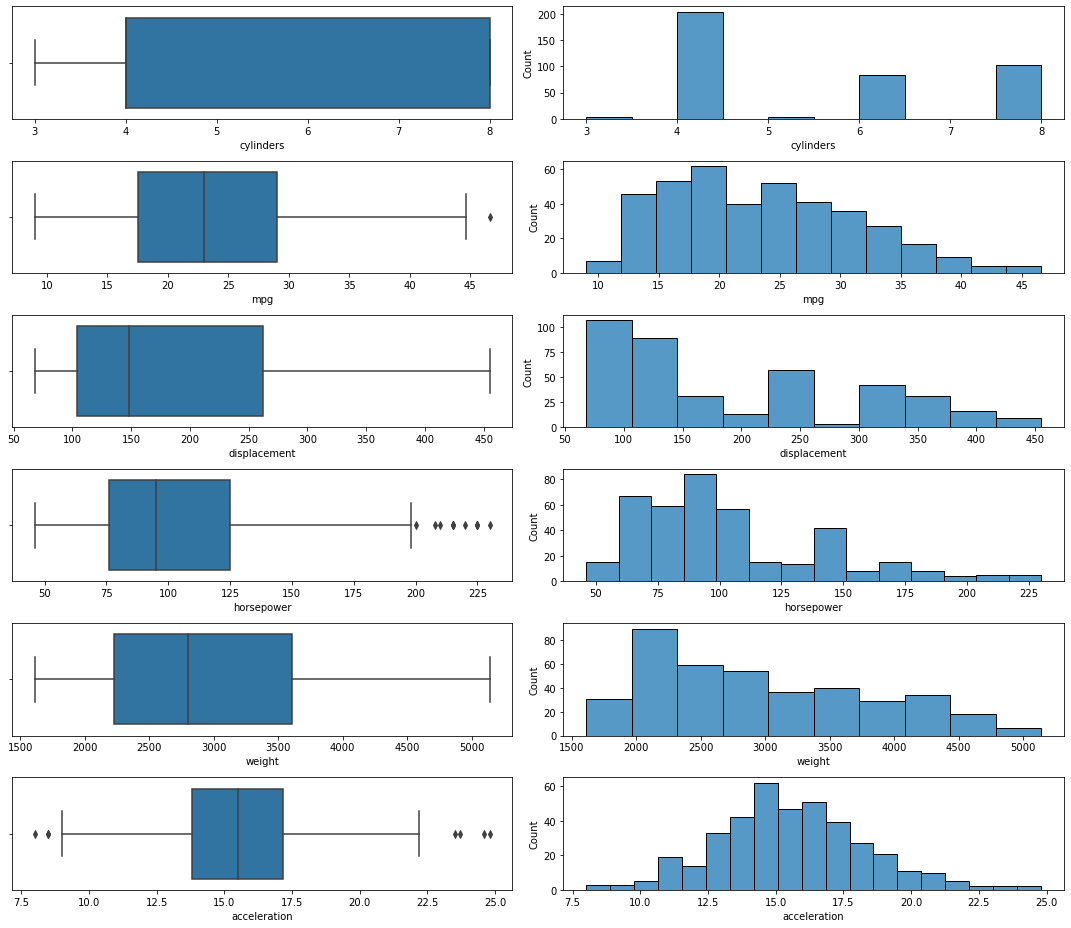

In [36]:
## all fields with two plot ( box, histplot) in same axis
fig, ax = plt.subplots(6,2, figsize = (15,13))
sns.boxplot(x = df["cylinders"], ax = ax[0,0])
sns.histplot(df['cylinders'], ax = ax[0,1])
sns.boxplot(x = df["mpg"], ax = ax[1,0])
sns.histplot(df['mpg'], ax = ax[1,1])
sns.boxplot(x = df["displacement"], ax = ax[2,0])
sns.histplot(df['displacement'], ax = ax[2,1])
sns.boxplot(x = df["horsepower"], ax = ax[3,0])
sns.histplot(df['horsepower'], ax = ax[3,1])
sns.boxplot(x = df["weight"], ax = ax[4,0])
sns.histplot(df['weight'], ax = ax[4,1])
sns.boxplot(x = df["acceleration"], ax = ax[5,0])
sns.histplot(df['acceleration'], ax = ax[5,1])
plt.tight_layout()

Text(0.5, 1.0, 'weight')

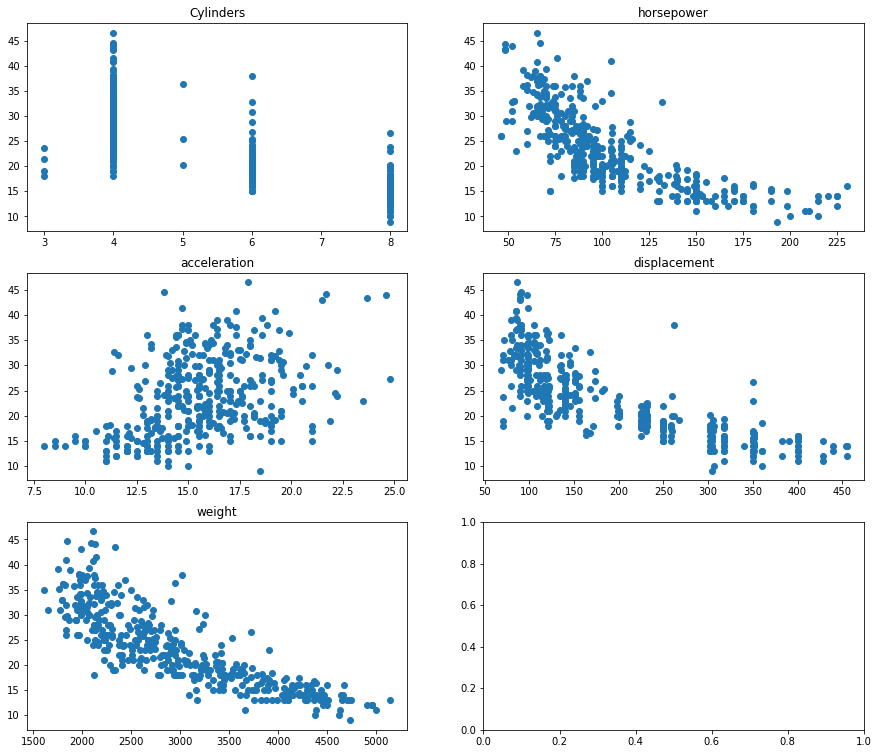

In [38]:
### visualization 
    
#Bivariate 
 ## MPG is common field for comparision realtion ship with another columns cylinder,hp, displacemnet, accelaration , weight 
## all fields with two plot ( box, histplot) in same axis
fig, axarr = plt.subplots(3,2, figsize = (15,13))
mpgval = df.mpg.values 
##mpgval vs cylinder
axarr[0,0].scatter(df.cylinders.values, mpgval)
axarr[0,0].set_title("Cylinders")
##mpgval vs hp
axarr[0,1].scatter(df.horsepower.values, mpgval)
axarr[0,1].set_title("horsepower")
##mpgval vs wieght
axarr[1,0].scatter(df.acceleration.values, mpgval)
axarr[1,0].set_title("acceleration")
##mpgval vs displacement
axarr[1,1].scatter(df.displacement.values, mpgval)
axarr[1,1].set_title("displacement")
##mpgval vs displacement
axarr[2,0].scatter(df.weight.values, mpgval)
axarr[2,0].set_title("weight")